In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

# plt.style.use('seaborn')

Load Dataset and check datatypes

In [2]:
df = pd.read_csv("FRS_2 2023-12-06T1158.csv")
# print(df)
##  Shorten col names
df.rename(columns = {'ALSFRS Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'ALSFRS Data ALSFRS Entry Date':'Date'}, inplace = True)
df.rename(columns = {'ALSFRS Data Frs Climbing Stairs':'Stairs'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Cutting Food':'Cutting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dressing Hygiene':'Dressing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dyspnea':'Dyspnea'}, inplace = True) ##Does not exist
df.rename(columns = {'ALSFRS Data FRS Handwriting':'Handwriting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Orthopnea':'Ortho'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Respiratory Insufficiency':'Low_O2'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Salivation':'Saliva'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Speech':'Speech'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Swallowing':'Swallowing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Turning in Bed':'Turning'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Walking':'Walking'}, inplace = True)
df.rename(columns = {'ALSFRS Data Total Score':'Total'}, inplace = True)
df = df[['ID', 'Date', 'Stairs', 'Cutting', 'Dressing', 'Dyspnea', 'Handwriting', 'Ortho', 
         'Low_O2', 'Saliva', 'Speech', 'Swallowing', 'Turning', 'Walking', 'Total']]
df= df.sort_values(by=['ID'], ascending=True)
print(df.iloc[0:5,:])
print(df.dtypes) ## Show data types

         ID        Date  Stairs  Cutting  Dressing  Dyspnea  Handwriting  \
18023  47.0  2016-10-20     0.0      2.0       2.0      4.0          4.0   
20908  47.0  2015-06-01     2.0      4.0       3.0      4.0          4.0   
21356  47.0  2014-12-10     2.0      4.0       3.0      4.0          4.0   
21241  47.0  2015-02-25     2.0      4.0       3.0      4.0          4.0   
15856  47.0  2017-07-26     0.0      1.0       1.0      4.0          3.0   

       Ortho  Low_O2  Saliva  Speech  Swallowing  Turning  Walking  Total  
18023    4.0     4.0     4.0     4.0         4.0      1.0      0.0   33.0  
20908    4.0     4.0     4.0     4.0         4.0      3.0      2.0   42.0  
21356    4.0     4.0     4.0     4.0         4.0      3.0      3.0   43.0  
21241    4.0     4.0     4.0     4.0         4.0      3.0      2.0   42.0  
15856    4.0     4.0     4.0     4.0         4.0      0.0      0.0   29.0  
ID             float64
Date            object
Stairs         float64
Cutting        flo

Get stats

In [3]:
print(df)

           ID        Date  Stairs  Cutting  Dressing  Dyspnea  Handwriting  \
18023    47.0  2016-10-20     0.0      2.0       2.0      4.0          4.0   
20908    47.0  2015-06-01     2.0      4.0       3.0      4.0          4.0   
21356    47.0  2014-12-10     2.0      4.0       3.0      4.0          4.0   
21241    47.0  2015-02-25     2.0      4.0       3.0      4.0          4.0   
15856    47.0  2017-07-26     0.0      1.0       1.0      4.0          3.0   
...       ...         ...     ...      ...       ...      ...          ...   
64     2145.0  2023-11-17     1.0      3.0       3.0      4.0          3.0   
47     2147.0  2023-11-20     4.0      4.0       3.0      4.0          4.0   
6      2150.0  2023-11-26     4.0      4.0       4.0      4.0          4.0   
5      2151.0  2023-11-26     2.0      1.0       1.0      3.0          1.0   
21464     NaN         NaN     NaN      NaN       NaN      NaN          NaN   

       Ortho  Low_O2  Saliva  Speech  Swallowing  Turning  Walk

In [4]:
df.describe()

,ID,Stairs,Cutting,Dressing,Dyspnea,Handwriting,Ortho,Low_O2,Saliva,Speech,Swallowing,Turning,Walking,Total
count,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000,21464.000000
mean,895.193254,1.786526,2.309728,2.267704,3.143496,2.536014,3.445304,3.448379,3.187989,2.940225,3.161852,2.531168,2.251258,33.009644
std,588.628320,1.516160,1.411855,1.256577,1.158783,1.346749,0.921708,0.933836,1.048213,1.250752,1.171930,1.232796,1.175111,10.338102
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,384.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,27.000000
50%,740.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,35.000000
75%,1396.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,41.000000
max,2151.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000


Histograms

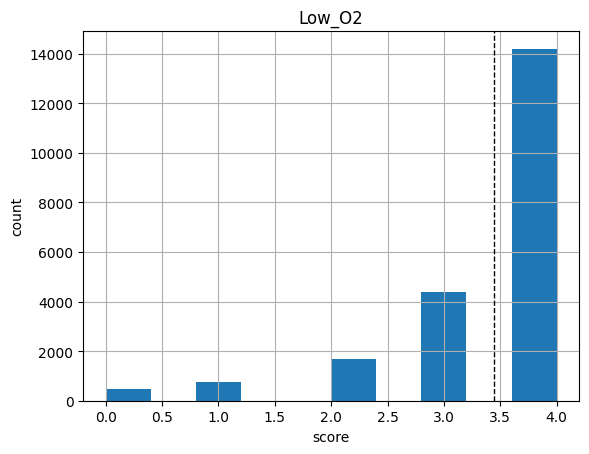

<AxesSubplot: title={'center': 'Outliers'}, xlabel='ID', ylabel='Low_O2'>

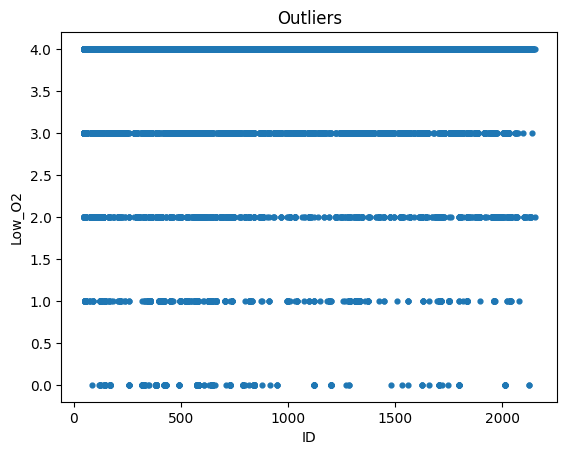

In [5]:
df['Low_O2'].hist()
plt.axvline(df['Low_O2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("score")
plt.ylabel("count")
plt.title('Low_O2')
plt.show()

df.plot(kind='scatter', x='ID', y='Low_O2', s=12, title="Outliers")